In [174]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/lkeselma/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


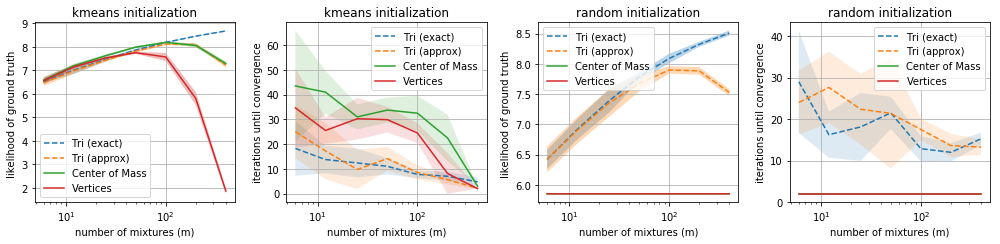

In [200]:
df = pd.read_csv("bunny_1k_com_verts_tri.log",names=['k','init','model','l','i'])
mdf = df.groupby(['init','model','k']).mean()
sdf = df.groupby(['init','model','k']).std()

fig = plt.figure(figsize=(14,3.5))
for ii, init in enumerate(['kmeans','random']):
    for model in [3,0,1,2]:
        ls = '--' if model == 0 or model ==3 else '-'
        if model == 0:
            label = 'Tri (approx)'
        if model == 1:
            label = 'Center of Mass'
        if model == 2:
            label = 'Vertices'
        if model == 3:
            label = 'Tri (exact)'
        ldf = mdf.loc[(init,model),]
        x = np.array(ldf.index)
        
        y = ldf.values[:,0]
        error = 2*sdf.loc[(init,model),].values[:,0]

        ax = plt.subplot(1,4,1+ii*2)
        plt.plot(x,y,ls=ls,label=label)
        plt.fill_between(x, y-error, y+error,alpha=0.3)
        plt.grid(True)
        plt.xlabel('number of mixtures (m)')
        plt.title('{} initialization'.format(init))
        plt.ylabel('likelihood of ground truth ')
        #plt.ylim(2,9)
        ax.set_xscale("log", nonposx='clip')

        y = ldf.values[:,1]
        error = sdf.loc[(init,model),].values[:,1]
    
        ax = plt.subplot(1,4,2+ii*2)
        plt.plot(x,y,ls=ls,label=label)
        plt.fill_between(x, y-error, y+error,alpha=0.15)

        ax.set_xscale("log", nonposx='clip')
        plt.grid(True)
        plt.xlabel('number of mixtures (m)')
        plt.title('{} initialization'.format(init))
        plt.ylabel('iterations until convergence')
        #plt.subplot(2,2,3)
        #plt.subplot(2,2,4)
for i in range(4):
    plt.subplot(1,4,1+i)
    plt.legend()
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.tight_layout()
plt.savefig('graph_tri_v_vert4.pdf')

In [151]:
#mdf.loc[('kmeans',0),].values, np.array(mdf.loc[('kmeans',0),].index)

In [176]:
mdf

l       i
init   model k                    
kmeans 0     6    6.473133  25.000
             12   6.982335  17.250
             25   7.432679   9.750
             50   7.820730  14.125
             100  8.118590   8.500
             200  8.098609   5.625
             400  7.225908   2.125
       1     6    6.591015  43.500
             12   7.196780  41.000
             25   7.623827  31.000
             50   7.991327  33.750
             100  8.194601  32.500
             200  8.060785  22.500
             400  7.289951   3.000
       2     6    6.566109  34.625
             12   7.149824  25.500
             25   7.531863  30.250
             50   7.753287  29.875
             100  7.573520  24.500
             200  5.802793   8.125
             400  1.860338   2.000
       3     6    6.518060  18.250
             12   7.010287  13.750
             25   7.464616  12.375
             50   7.867676  11.000
             100  8.194706   7.750
             200  8.458593   7.000
             400  8.681404   4.750
random 0     6    6.419766  24.000
             12   6.899292  27.625
             25   7.351901  22.375
             50   7.672524  21.375
             100  7.899429  17.500
             200  7.885317  13.625
             400  7.528108  13.250
       1     6    5.851120   2.000
             12   5.851152   2.000
             25   5.851151   2.000
             50   5.851158   2.000
             100  5.851159   2.000
             200  5.851157   2.000
             400  5.851149   2.000
       2     6    5.850692   2.000
             12   5.850785   2.000
             25   5.850778   2.000
             50   5.850786   2.000
             100  5.850751   2.000
             200  5.850770   2.000
             400  5.850764   2.000
       3     6    6.420565  29.000
             12   6.915246  16.250
             25   7.388798  18.125
             50   7.784384  21.500
             100  8.089863  12.875
             200  8.323947  12.000
             400  8.510578  15.250